# Polynomial Regression

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [137]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### pre-process the data

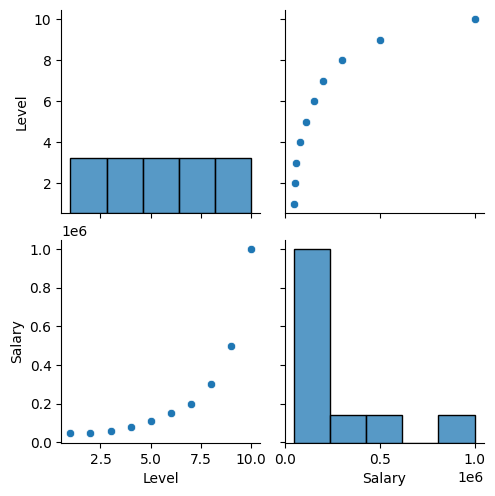

In [138]:
sns.pairplot(df)

In [123]:
# remove the Position column as it is not needed because of Level column
df.drop('Position', axis=1, inplace=True)

In [124]:
# add the polynomial terms of Level
df['Level0'] = df['Level'] ** 0
df['Level1'] = df['Level'] ** 1
df['Level2'] = df['Level'] ** 2
df['Level3'] = df['Level'] ** 3
df['Level4'] = df['Level'] ** 4
df['Level5'] = df['Level'] ** 5
df['Level6'] = df['Level'] ** 6

In [125]:
# as we have already added Level1 (which is same as Level), 
# there is not need to keep Level column
del df['Level']

In [126]:
df.head()

,Salary,Level0,Level1,Level2,Level3,Level4,Level5,Level6
0,45000,1,1,1,1,1,1,1
1,50000,1,2,4,8,16,32,64
2,60000,1,3,9,27,81,243,729
3,80000,1,4,16,64,256,1024,4096
4,110000,1,5,25,125,625,3125,15625


In [127]:
# split data into x and y
x = df.drop('Salary', axis=1)
y = df['Salary']

In [128]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the model

In [129]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [130]:
y_pred = model.predict(x_test)
y_true = y_test

In [131]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
mae

20952.380944029643

In [132]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
mse

598554421.3274453

In [133]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

24465.371882059044

In [134]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.9615215014860928

### result visualization

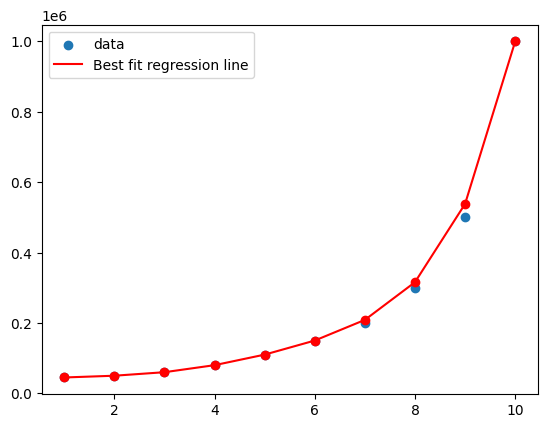

In [135]:
# data visualization
plt.scatter(x['Level1'], y, label="data")

# regression line visualization
predictions = model.predict(x)
plt.scatter(x['Level1'], predictions, color="red")
plt.plot(x['Level1'], predictions, color="red", label="Best fit regression line")

plt.legend()